<a href="https://colab.research.google.com/github/jrebull/NLP/blob/main/Team18_MNA_NLP_semana_5_Actividad_Embeddings_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Somos el Equipo de los SIHINOS Jarcos estuvo aqui
 Arranca la aventura a Javilandia en la Jarconavegación acompañado de la Monshemagia ...esto se pondrá intenso...D:
⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰

# Tocando La Sihinilibreta v3

Log de Cambios

# 2025-Mayo-14 - Javihino 18 horas Mexico time
# 2025-Mayo-14 - Javihino 21 horas Mexico time. -- SE ARREGLAN ENUNCIADOS

# 2025-Mayo-17 - Jarcos se agrega lematizado, se genera embedding con nuevo diccionario, se arregla carga y generacion de embedding, se agrega otra vista a la matriz de confusion y entrenamiento


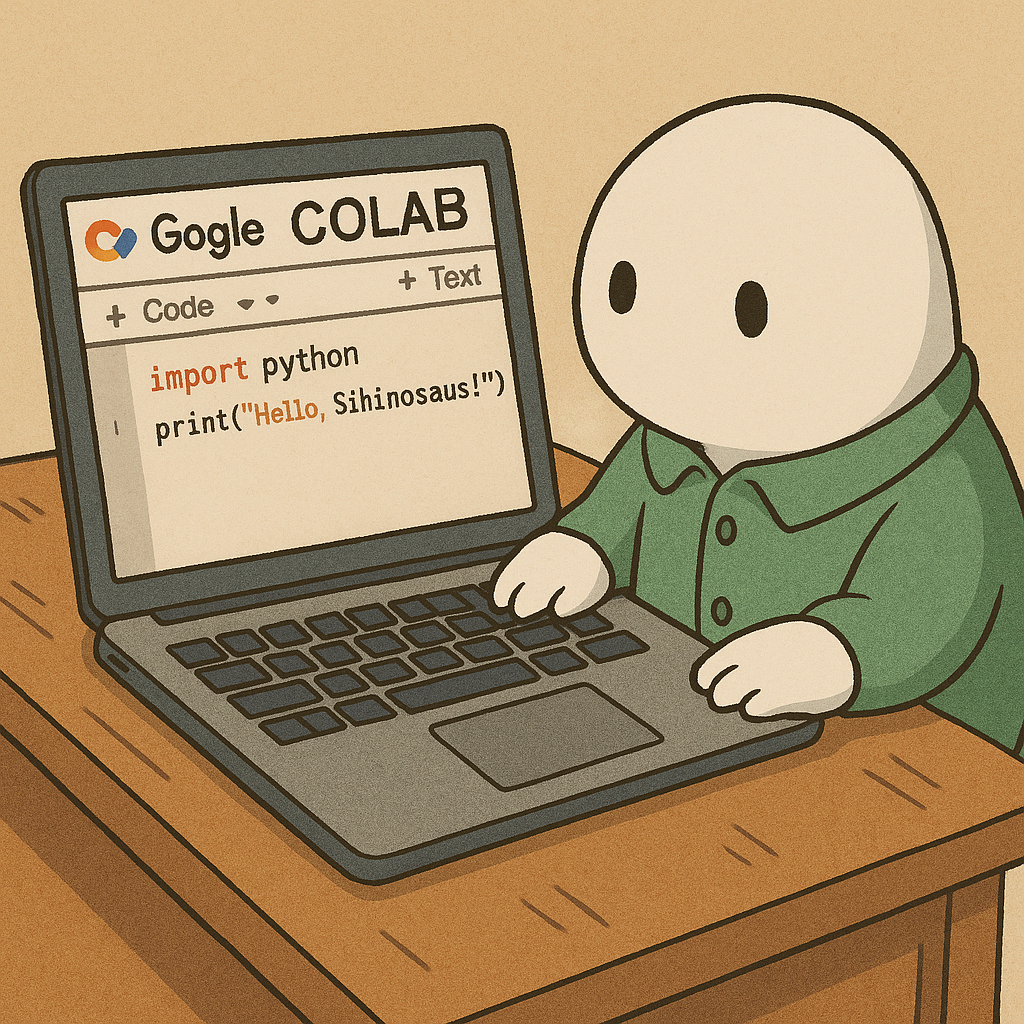

# ✨ **Actividad 35.2: Explorando Vectores Embebidos con OpenAI** ✨
## _Análisis Continuado de Datasets: Amazon, Yelp & IMDb - Semana 5_

---
---

## 🗓️ **Información General**
> **Fecha de Entrega:** Lunes, 19 de Mayo de 2025
>
> **Versión del Documento:** `v2.0`

---
---

## 👥 **Autores del Proyecto**

> ### 👨‍💻 **Juan Carlos Pérez Nava**
> `A01795941`
>
> ### 👨‍💻 **Javier Augusto Rebull Saucedo**
> `A01795838`
>
> ### 👩‍💻 **Sihiní Trinidad Sánchez**
> `A00889358`
>
> ### 👩‍💻 **Iris Monserrat Urbina Casas**
> `A01795999`

---
---

## 👨‍🏫 **Supervisión Académica**
> **Profesor Tutor:**
>
> Rodolfo Miguel Gameros Leal

---
---

# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad Semana 5

### **Vectores Embebidos de OpenAI**

---

## Introducción

En la actividad de esta semana trabajarás en equipos con el modelo de **vectores embebidos** de OpenAI.

Los actuales **Modelos de Lenguaje de Gran Escala (LLM)** pueden generar vectores embebidos para cada token, palabra o enunciado que les proporciones. El coste computacional y de uso de recursos será un factor clave a la hora de elegir cuál utilizar.

Una forma inicial de trabajar con estos modelos pre-entrenados es generar un **vocabulario** a partir de tu conjunto de datos de entrenamiento. Posteriormente, cada palabra de tu vocabulario se sustituye por su correspondiente vector embebido. De manera predeterminada, cuando no exista un vector para una palabra en particular, se elige el vector más cercano en **similaridad**, o bien, se puede optar por eliminar dicha palabra.

Existen diversas propuestas para utilizar estos **vectores embebidos** como entrada para modelos de aprendizaje automático. Cuando se trabaja con los vectores embebidos de cada palabra/token, una forma de representar un enunciado es sustituyéndolo por el **vector promedio** de todos los vectores embebidos que lo componen.

En esta actividad, vamos a comparar diferentes modelos de **aprendizaje automático** (machine learning) aplicando vectores embebidos a cada palabra, en comparación con aplicarlos directamente a los comentarios completos.


---

In [ ]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:

# -------------------------------------------
# INSTALACIÓN DE PAQUETES
# -------------------------------------------
!pip install contractions # Instala 'contractions' para expandir contracciones (e.g., "don't" -> "do not").

# -------------------------------------------
# MANEJO DE DATOS
# -------------------------------------------
import pandas as pd # Para DataFrames y manipulación de datos.
import gdown        # Para descargar archivos desde Google Drive.
import numpy as np  #Proporciona manejo para objetos de matrices multidimensional

# -------------------------------------------
# PROCESAMIENTO DE LENGUAJE NATURAL (NLP)
# -------------------------------------------
import re           # Para expresiones regulares (limpieza de texto, patrones).
import contractions # Expande contracciones en texto (e.g., "I'm" -> "I am").
import nltk                       # Toolkit principal para NLP.
from nltk.corpus import stopwords # Lista de palabras vacías (a eliminar).
from nltk.corpus import wordnet   # Para lematización avanzada, sinónimos (opcional).
nltk.download('stopwords')        # Descarga la lista de stopwords de NLTK.
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.stem import WordNetLemmatizer # Herramienta para reducir palabras a su forma base (lema).

# -------------------------------------------
# UTILIDADES DE MACHINE LEARNING
# -------------------------------------------
from sklearn.model_selection import train_test_split # Divide datasets en entrenamiento/prueba de manera aleatoria.
from sklearn.metrics import confusion_matrix         # Calcula la matriz de confusión para evaluar la precisión de un modelo de clasificación.
from sklearn.linear_model import LogisticRegression  # Implementa la regresión logística, útil para problemas de clasificación binaria.
from sklearn.ensemble import RandomForestClassifier  # Crea un clasificador basado en un conjunto de árboles de decisión.
from sklearn.metrics import classification_report


# -------------------------------------------
# COLECCIONES Y UTILIDADES DE PYTHON
# -------------------------------------------
from collections import Counter # Cuenta la frecuencia de elementos (e.g., palabras).
import os                       # Para interactuar con el sistema operativo (archivos/directorios).


# -------------------------------------------
# (Otras categorías si es necesario)
# -------------------------------------------
import pickle                    # Útil para guardar modelos de machine learning o embeddings generados con la API de OpenAI.
import matplotlib.pyplot as plt  # Biblioteca de visualización para crear gráficos.
import seaborn as sns            # Facilita la creación de gráficos estadísticos.
from tabulate import tabulate

print('\n\n')
print("📚✅ ¡Librerías cargadas y listas para la acción! 🚀")
print('\n\n')

[nltk_data] Downloading package stopwords to /home/jarcos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jarcos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/jarcos/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!





📚✅ ¡Librerías cargadas y listas para la acción! 🚀





In [ ]:
# Incluye las celdas necesarias para tu acceso a la API de OpenAI.

# -------------------------------------------
# IMPORTACIÓN DE LIBRERÍAS Y CONFIGURACIÓN
# -------------------------------------------
from google.colab import userdata # Para acceder a 'secrets' (como API keys) guardados en Colab.
from openai import OpenAI # Cliente oficial de Python para la API de OpenAI (versión más reciente).
import openai # Importa el módulo principal de la librería OpenAI (usado en versiones anteriores o para acceso a nivel de módulo).
import tiktoken # Librería utilizada para contar y manejar tokens de modelos de OpenAI.




## 1️⃣ **Pregunta - 1**

### 1. **Generación del DataFrame a partir de los archivos:**

1. **Descarga de los archivos:**  
   Descarga los 3 archivos de **Canvas**:  
   - `amazon5.txt`
   - `imdb5.txt`
   - `yelp5.txt`

2. **Creación del DataFrame:**  
   Genera un solo **DataFrame de Pandas** combinando los tres archivos.

3. **Verificación de los registros:**  
   Verifica que tienes **3000 registros** en el DataFrame, con sus respectivas etiquetas.  
   En particular, el archivo de datos de IMDb ya no requiere transformación para obtener sus 1000 registros.

---


Descarga los 3 archivos de Canvas y genera un nuevo DataFrame de Pandas con ellos.

**Llama simplemente "df" a dicho DataFrame.**

Los archivos los encuentras en Canvas: amazon5.txt, imdb5.txt, yelp5.txt.

## Rubrica - Ejercicio 01 - Cumple con lo pedido




In [ ]:
# --- 1. Creación del Directorio de Datos ---
output_directory = 'datos'
if not os.path.exists(output_directory):
    os.makedirs(output_directory, exist_ok=True) # Crea el directorio si no existe; exist_ok=True evita error si ya existe
    print(f"Directorio '{output_directory}' creado exitosamente.")
else:
    print(f"El directorio '{output_directory}' ya existe.")

# --- 2. Definición de URLs y Nombres de Archivos para Descarga ---
files_to_download = [
    {'url': 'https://drive.google.com/uc?id=1HW2IsfUBLeIHpkRsRcy4xoU1UVwL419a', 'filename': 'amazon5.txt', 'dataset_name': 'Amazon'},
    {'url': 'https://drive.google.com/uc?id=1xGRzo6Epj-ix1kzJUAeMRB2iwqR3FnTc', 'filename': 'imdb5.txt',   'dataset_name': 'IMDb'},
    {'url': 'https://drive.google.com/uc?id=1AJ4uy5iQPoq7Pm2ZNSr0pS8UBQqquxwj', 'filename': 'yelp5.txt',   'dataset_name': 'Yelp'},
    {'url': 'https://drive.google.com/uc?id=1nNNItqMXkG6cjPqR2fbAXGu2-N5iwqzV', 'filename': 'embeddings_diccionario_large.pkl',   'dataset_name': 'embeddings_large'}, #text-embedding-3-large
    {'url': 'https://drive.google.com/uc?id=18lZgJQGETcgAtD48RlPGvTdImqNBm7wL', 'filename': 'embeddings_diccionario_p10.pkl',   'dataset_name': 'embeddings_p10'} #text-embedding-3-large
]


# --- 3. Proceso de Descarga de Archivos ---
print("\nIniciando la descarga de datos...")
all_downloads_successful = True
for item in files_to_download:
    output_path = os.path.join(output_directory, item['filename'])
    print(f"Descargando {item['dataset_name']} ({item['filename']})...")
    try:
        gdown.download(item['url'], output_path, quiet=False)
    except Exception as e:
        print(f"Ocurrió un error durante la descarga de {item['filename']}: {e}")
        all_downloads_successful = False
        # Podrías decidir si continuar con los otros archivos o detenerte:
        # break # para detenerse en el primer error

if all_downloads_successful:
    print(f"\n✅ Descarga de todos los archivos completada. Guardados en '{output_directory}'.")
else:
    print(f"\n⚠️ Algunos archivos no pudieron ser descargados. Revisa los mensajes de error.")


# --- 4. Carga de Datos en DataFrames de Pandas ---
print("\n\n\nCargando datos en DataFrames...")
try:
    # Carga Amazon: delimitado por tabulador, sin encabezado, columnas 'review' y 'label'
    dfa = pd.read_csv(os.path.join(output_directory, 'amazon5.txt'),
                      sep='\t', names=['review','label'], header=None, encoding='utf-8')

    # Carga IMDb: delimitado por 2 o más espacios (regex), sin encabezado, columnas 'review' y 'label'
    # Se usa engine='python' para separadores regex complejos y evitar warnings.
    dfi = pd.read_csv(os.path.join(output_directory, 'imdb5.txt'),
                      sep=' {2,}', names=['review','label'], header=None, encoding='utf-8', engine='python')

    # Carga Yelp: delimitado por tabulador, sin encabezado, columnas 'review' y 'label'
    dfy = pd.read_csv(os.path.join(output_directory, 'yelp5.txt'),
                      sep='\t', names=['review','label'], header=None, encoding='utf-8')

    # --- 5. Combinación de DataFrames ---
    # Concatena los DataFrames individuales en uno solo, reiniciando el índice.
    df = pd.concat([dfa, dfi, dfy], ignore_index=True)
    print(f"\n✅ DataFrames cargados y combinados. Total de filas: {len(df)}")
    # print(df.info()) # Descomenta para ver información del DataFrame combinado
    # print(df.head())   # Descomenta para ver las primeras filas

except FileNotFoundError as e:
    print(f"❌ Error al cargar archivo: {e}. Asegúrate de que los archivos se descargaron correctamente.")
except Exception as e:
    print(f"❌ Ocurrió un error inesperado durante la carga de datos: {e}")


# *********** Aquí termina la sección de agregar código *************

Directorio 'datos' creado exitosamente.

Iniciando la descarga de datos...
Descargando Amazon (amazon5.txt)...


Downloading...
From: https://drive.google.com/uc?id=1HW2IsfUBLeIHpkRsRcy4xoU1UVwL419a
To: /home/jarcos/datos/amazon5.txt
100%|███████████████████████████████████████████████████████████████████████████████| 58.2k/58.2k [00:00<00:00, 992kB/s]


Descargando IMDb (imdb5.txt)...


Downloading...
From: https://drive.google.com/uc?id=1xGRzo6Epj-ix1kzJUAeMRB2iwqR3FnTc
To: /home/jarcos/datos/imdb5.txt
100%|██████████████████████████████████████████████████████████████████████████████| 86.0k/86.0k [00:00<00:00, 1.07MB/s]


Descargando Yelp (yelp5.txt)...


Downloading...
From: https://drive.google.com/uc?id=1AJ4uy5iQPoq7Pm2ZNSr0pS8UBQqquxwj
To: /home/jarcos/datos/yelp5.txt
100%|███████████████████████████████████████████████████████████████████████████████| 61.3k/61.3k [00:00<00:00, 846kB/s]


Descargando embeddings_large (embeddings_diccionario_large.pkl)...


Downloading...
From: https://drive.google.com/uc?id=1nNNItqMXkG6cjPqR2fbAXGu2-N5iwqzV
To: /home/jarcos/datos/embeddings_diccionario_large.pkl
100%|██████████████████████████████████████████████████████████████████████████████| 89.3M/89.3M [00:04<00:00, 18.7MB/s]


Descargando embeddings_p10 (embeddings_diccionario_p10.pkl)...


Downloading...
From: https://drive.google.com/uc?id=18lZgJQGETcgAtD48RlPGvTdImqNBm7wL
To: /home/jarcos/datos/embeddings_diccionario_p10.pkl
100%|██████████████████████████████████████████████████████████████████████████████| 82.7M/82.7M [00:01<00:00, 52.5MB/s]


✅ Descarga de todos los archivos completada. Guardados en 'datos'.



Cargando datos en DataFrames...

✅ DataFrames cargados y combinados. Total de filas: 3000


In [ ]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [ ]:
# Y veamos sus primeros registros:

df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
# Y veamos sus primeros registros:

df.tail()

,review,label
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0
2999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
# Muestra 20 filas seleccionadas de forma aleatoria del DataFrame
df.sample(n=20)

,review,label
258,Excellent hands free tool.,1
120,I've tried several different earpieces for my ...,1
1380,All this movie does is make you sick watching ...,0
1317,The telephone repair man was really funny and ...,1
2813,It was packed!!,0
2377,"In an interesting part of town, this place is ...",1
1683,A good film by a great director!,1
647,Great phone.,1
1441,But the convoluted plot just didn't convince m...,0
1798,"It is wonderful and inspiring to watch, and I ...",1


# **Pregunta - 2:**

2. Realiza un proceso de limpieza. Aplica el preprocesamiento que consideres adecuado a todos los
comentarios. Llama Xclean a los comentarios procesados y Y a las etiquetas.

Realiza el proceso de limpieza. Aplica el preprocesamiento que consideres adecuado.











In [ ]:

# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********
X = df['review']
Y = df['label']

stopwords_engl = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean(texto):

  # 1️⃣ Normalizar a minúsculas
  text = texto.lower()

  # 2️⃣ Conservar solo letras y apóstrofes; colapsar espacios múltiples
  text = re.sub(r"[^a-z']", " ", text)
  text = re.sub(r"\s{2,}", " ", text).strip()

  # 3️⃣ Tokenización inicial por espacios
  tokens = text.split()

  # 4️⃣ Expandir contracciones (requiere módulo 'contractions')
  tokens = [contractions.fix(tok) for tok in tokens]

  # 5️⃣ División secundaria (por si quedaron sub-tokens)
  tokens =   tokens = " ".join(tokens).split()


  # 6️⃣ Eliminar apóstrofes remanentes y otros símbolos
  tokens = [re.sub(r"[^a-z]", "", tok) for tok in tokens]


  # 7️⃣ Filtrar stopwords y tokens muy cortos
  tokens = [tok for tok in tokens if tok not in stopwords_engl and len(tok) > 1]

  return tokens

def clean_doc(doc):

  # Inicializa el lematizador de WordNet
  lemmatizer = WordNetLemmatizer()

  # 1️⃣ Aplica lematización a cada palabra en el documento
  tokens = [lemmatizer.lemmatize(
            lemmatizer.lemmatize(
            lemmatizer.lemmatize(palabra,
            # 2️⃣ Primera lematización, tratando la palabra como verbo
            pos='v'),
            # 3️⃣ Luego, lematiza considerando la palabra como un sustantivo
            pos='n'),
            # 4️⃣Finalmente, lematiza considerando la palabra como un adjetivo
            pos='a')
            # Itera sobre cada palabra en el documento, asegurando que no sea vacía
            for palabra in doc if palabra ]

  # 5️⃣ Filtrar stopwords y tokens muy cortos
  tokens = [tok for tok in tokens if tok not in stopwords_engl and len(tok) > 1]

  return tokens

Xcleantok = [clean(x) for x in X]
Xclean = [clean_doc(x) for x in Xcleantok]

# *********** Aquí termina la sección de agregar código *************

In [ ]:
# Despleguemos los primeros comentarios después de tu proceso de limpieza:

for x in Xclean[0:5]:
  print(x)


['way', 'plug', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tie', 'charger', 'conversation', 'last', 'minute', 'major', 'problem']
['mic', 'great']


# **Pregunta - 3:**

### 3. Partición aleatoria de los datos:

1. **Realización de la partición:**  
   Realiza una partición aleatoria de los datos utilizando los mismos porcentajes que en la práctica de la semana pasada para poder comparar los resultados con los de esta actividad. Los porcentajes serán:
   - **Entrenamiento:** 70%
   - **Validación:** 15%
   - **Prueba:** 15%

2. **Verificación de registros:**  
   Verifica que obtienes:
   - **2100 registros** para el conjunto de entrenamiento.
   - **450 registros** para cada uno de los conjuntos de validación y prueba.

3. **Uso de semilla:**  
   Utiliza una semilla para la partición de los datos.

---



Realicemos una partición aleatoria con los mismos porcentajes de la práctica pasada para poder comparar dichos resultados con los de
esta actividad, a saber, 70%, 15% y 15%, para entrenamiento, validación y prueba, respectivamente.

In [ ]:

# ************* Inicia la sección de agregar código:*****************************

# ——————————————————————————
# 1️⃣ Partición inicial: 70% train, 30% (val + test)
# ——————————————————————————

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(
    Xclean,               # Lista de comentarios procesados
    Y,                    # Serie de etiquetas
    train_size=0.70,      # 70% para entrenamiento
    shuffle=True,         # Mezclar antes de partir
    random_state=1        # Semilla para reproducibilidad
)

# ——————————————————————————
# 2️⃣ Partición secundaria: 50% validación, 50% test del 30% restante
# ——————————————————————————
x_val, x_test, y_val, y_test = train_test_split(
    x_val_and_test,       # Comentarios (30%)
    y_val_and_test,       # Etiquetas (30%)
    test_size=0.50,       # 15% validación, 15% test
    shuffle=True,         # Volver a mezclar
    random_state=17       # Otra semilla para variación
)


# *********** Termina la sección de agregar código *************


# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


# **Pregunta - 4:**

### 4. Construye tu vocabulario a continuación:

1. **Uso del conjunto de entrenamiento:**  
   Utiliza el conjunto de entrenamiento para generar tu vocabulario con un tamaño que consideres adecuado. Si lo deseas, puedes filtrar tu vocabulario por:
   - Frecuencia mínima de uso de cada palabra.
   - Longitud mínima en caracteres.

2. **Tamaño del vocabulario:**  
   Indica el tamaño del vocabulario que generaste.

3. **Razón para usar solo el conjunto de entrenamiento:**  
   Explica por qué debe usarse únicamente el conjunto de entrenamiento para generar el vocabulario.

4. **Filtrado de conjuntos:**  
   Con el vocabulario generado, filtra los conjuntos de entrenamiento, validación y prueba para que todos los comentarios utilicen solo las palabras de este vocabulario.

---

Hasta este punto, básicamente has realizado transformaciones similares a las de la semana pasada, las cuales son válidas para muchos procesos dentro del análisis de textos. Ahora, procederemos con los vectores embebidos de cada palabra en cada comentario, en lugar de los vectores generados con las matrices Tf-idf.




Construye tu vocabulario a continuación


In [ ]:
# a.	Usa el conjunto de entrenamiento para generar tu vocabulario
#     con un tamaño que consideres adecuado:


# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********

midiccionario = Counter()  # Inicializar Counter vacío

# Iterar sobre cada lista de tokens de entrenamiento y actualizar conteos
for idx, tokens in enumerate(x_train, start=1):
    # idx: número de comentario procesado
    # tokens: lista de tokens para este comentario
    midiccionario.update(tokens)


# *********** Aquí termina la sección de agregar código *************

In [ ]:
# b.	Indica el tamaño del vocabulario generado.

print('Longitud del vocabulario generado:')


# ******* Inicia la sección de agregar código: ***********


print(f"🔹 Longitud del diccionario (vocabulario): {len(midiccionario)} palabras únicas\n")

print("🔸 Top 10 palabras más frecuentes (palabra, frecuencia):")
for word, freq in midiccionario.most_common(10):
    print(f"   • {word}: {freq}")


# *********** Aquí termina la sección de agregar código *************

Longitud del vocabulario generado:
🔹 Longitud del diccionario (vocabulario): 3227 palabras únicas

🔸 Top 10 palabras más frecuentes (palabra, frecuencia):
   • good: 202
   • great: 141
   • movie: 140
   • phone: 134
   • film: 130
   • work: 113
   • bad: 112
   • like: 101
   • time: 101
   • one: 100


c.	¿Por qué debe usarse solamente el conjunto de entrenamiento para generar el vocabulario?


### ++++++++ Inicia la sección de agregar texto: +++++++++++

Para evitar filtrado

### ++++++++ Termina la sección de agregar texto: +++++++++++


In [ ]:
# d.  Con el vocabulario generado, filtra los conjuntos de entrenamiento,
#     validación y prueba para que todos los comentarios usen solamente las
#     palabras de este vocabulario.

#     Llamar train_x, val_x y test_x a estos tres conjuntos.


# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********

# 1️⃣ Definir la frecuencia mínima para incluir un token en el vocabulario
min_freq = 1

# 2️⃣ Filtrar tokens con frecuencia ≥ min_freq
midicc = {
    token: freq
    for token, freq in midiccionario.items()
    if freq >= min_freq
}

# 3️⃣ (Opcional) Ordenar el vocabulario por frecuencia descendente
midicc = dict(sorted(midicc.items(), key=lambda item: item[1], reverse=True))

print(f"Total de palabras registradas en el diccionario: {len(midicc):,}")

train_x = []
for ss in x_train:
    # ss: lista de tokens de un comentario
    # Conservar solo tokens que existen en midicc (frecuencia >= min_freq)
    train_x.append([w for w in ss if w in midiccionario])

# 🔍 Conjunto de validación
val_x = []
for ss in x_val:
    # Mismo proceso de filtrado para validación
    val_x.append([w for w in ss if w in midiccionario])

# 🧪 Conjunto de prueba
test_x = []
for ss in x_test:
    # Mismo proceso de filtrado para test
    test_x.append([w for w in ss if w in midiccionario])



# *********** Aquí termina la sección de agregar código *************

Total de palabras registradas en el diccionario: 3,227


In [ ]:
# Vemos el resultado de los primeros comentarios del conjunto de entrenamiento:

for ss in train_x[0:5]:
  print(ss)

['co', 'star', 'fare', 'much', 'good', 'people', 'like', 'morgan', 'freeman', 'jonah', 'hill', 'ed', 'helm', 'waste']
['tonight', 'elk', 'filet', 'special', 'suck']
['pay', 'bill', 'tip', 'felt', 'server', 'terrible', 'job']
['call', 'steakhouse', 'cannot', 'properly', 'cook', 'steak', 'understand']
['however', 'keypad', 'tinny', 'sometimes', 'reach', 'wrong', 'button']


# **Pregunta - 5:**

### 5. Modelos de vectores embebidos de OpenAI

A continuación, se presenta un resumen de las principales características de los modelos de vectores embebidos de OpenAI:

1. **[text-embedding-ada-002](https://platform.openai.com/docs/models/text-embedding-ada-002):**
   - **Características:**
     - Modelo de embeddings optimizado para tareas de texto.
     - Ofrece una alta calidad en la representación semántica de los textos.
     - Diseñado para ser eficiente en términos de costos y velocidad.
   - **Aplicaciones:**
     - Análisis de sentimientos.
     - Clasificación de texto.
     - Búsqueda semántica.

2. **[text-embedding-3-small](https://platform.openai.com/docs/models/text-embedding-3-small):**
   - **Características:**
     - Variante más pequeña del modelo de embeddings de tercera generación.
     - Proporciona representaciones semánticas compactas.
     - Balance entre rendimiento y eficiencia computacional.
   - **Aplicaciones:**
     - Tareas de clasificación de texto de menor complejidad.
     - Análisis de grandes volúmenes de datos con recursos limitados.

3. **[text-embedding-3-large](https://platform.openai.com/docs/models/text-embedding-3-large):**
   - **Características:**
     - Modelo de embeddings de tercera generación con mayor capacidad.
     - Mejora en la calidad de las representaciones semánticas.
     - Requiere mayor capacidad computacional en comparación con la versión pequeña.
   - **Aplicaciones:**
     - Proyectos que requieren alta precisión en la representación de texto.
     - Análisis de texto en dominios complejos o especializados.

---

Para más detalles sobre estos modelos y su implementación, puedes consultar la documentación oficial de OpenAI en [https://platform.openai.com/docs/guides/embeddings](https://platform.openai.com/docs/guides/embeddings).



#### **Incluye aquí un resumen de las características y diferencias que tiene al menos los tres modelos de OpenAI indicados: "text-embedding-3-small", "text-embedding-3-large" y "text-embedding-ada-002".**

###  ++++++++ Inicia la sección de agregar texto: +++++++++++

Todos estos embeddings aceptan únicamente texto como entrada. Son modelos que transforman el texto en representaciones vectoriales.

- **text-embedding-3-small**: Es una versión mejorada con mayor rendimiento que el modelo Ada.
- **text-embedding-3-large**: Es el más potente para tareas en inglés y otros idiomas.
- **text-embedding-ada-002**: Es una versión optimizada con mejor rendimiento que el modelo embedding Ada.


<table>
  <tr>
    <th>Característica</th>
    <th>text-embedding-3-small</th>
    <th>text-embedding-3-large</th>
    <th>text-embedding-ada-002</th>
  </tr>
  <tr>
    <td>Rendimiento</td>
    <td>Bueno 🟢🟢</td>
    <td>Mejor 🟢🟢🟢</td>
    <td>Inferior 🟢</td>
  </tr>
    <tr>
    <td>Velocidad</td>
    <td>⏩⏩⏩</td>
    <td>⏩⏩</td>
    <td>⏩⏩</td>
  </tr>
  <tr>
    <td>Costo por Millon de Token</td>
    <td>0.02</td>
    <td>0.13</td>
    <td>0.10</td>
  </tr>
</table>

### ++++++++ Termina la sección de agregar texto: +++++++++++


# **Pregunta - 6:**

### 6. Generación del diccionario clave-valor con vectores embebidos:

1. **Uso de modelos de OpenAI:**  
   Utiliza alguno de los modelos de OpenAI para generar vectores embebidos. Debes crear un nuevo diccionario clave-valor donde:
   - **Clave:** Cada palabra de tu vocabulario.
   - **Valor:** El vector embebido correspondiente, de la dimensión proporcionada por el modelo seleccionado.

2. **Guardado del diccionario:**  
   Una vez generado el diccionario de vectores embebidos, es recomendable guardarlo en un archivo, utilizando el formato que consideres más adecuado (por ejemplo, `pickle`, `npz` o cualquier otro formato relevante).

3. **Colaboración en equipo:**  
   Apóyense entre los miembros del equipo para trabajar con los diferentes modelos de vectores embebidos, considerando los costos de cada modelo.

4. **Cantidad de tokens utilizados:**  
   Indica la cantidad de tokens de OpenAI que se han utilizado durante este proceso.

---


#### **Diccionario clave-valor de palabras del diccionario y vectores embebidos.**

In [ ]:
# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********
def obtener_embedding(diccionario,respaldo):
  print(f"Generando embeddings para {len(diccionario):,} registros.")
  ruta_dicc = os.path.join(output_directory, respaldo)
  numero_tokens = 0

  modelo = "text-embedding-3-large"
  tokenizador = tiktoken.encoding_for_model(modelo)

  conteo_tokens = {clave: len(tokenizador.encode(str(valor))) for clave, valor in diccionario.items()}
  total_tokens = sum(conteo_tokens.values())

  print(f"Total estimado de tokens: \033[32m\033[1m{total_tokens:,}\033[0m")

  if os.path.exists(ruta_dicc):
      print(f"El archivo {ruta_dicc} localizado.")
      try:
        with open(ruta_dicc, 'rb') as archivo:
          diccionario_cargado = pickle.load(archivo)
          print(f"Diccionario cargado.")
        return diccionario_cargado
      except pickle.UnpicklingError:
        print(f"Error al cargar el archivo {ruta_dicc}.")
        return None
      except Exception as e:
        print(f"Ocurrió un error al cargar el archivo: {e}")
        return None
  else:
      print(f"El archivo {ruta_dicc} no localizado.")
      diccionario_vectores = {}

      for palabra in diccionario:
        respuesta = openai.embeddings.create(
        input=palabra,
        model="text-embedding-3-large"
        )
        diccionario_vectores[palabra] = respuesta.data[0].embedding
        numero_tokens += respuesta.usage.total_tokens

      print(f"Embeddings generados: {len(diccionario_vectores):,} vectores.")
      print(f"Total de tokens utilizados: {numero_tokens:,}.")

      with open(respaldo, 'wb') as archivo:
        pickle.dump(diccionario_vectores, archivo)

      return diccionario_vectores

respaldo = 'embeddings_diccionario_large.pkl'
diccionario_vectores = obtener_embedding(midicc,respaldo)

  # *********** Aquí termina la sección de agregar código *************



Generando embeddings para 3,227 registros.
Total estimado de tokens: 3,227
El archivo datos/embeddings_diccionario_large.pkl localizado.
Diccionario cargado.


# **Pregunta - 7:**

### 7. Uso de vectores embebidos en modelos de aprendizaje automático:

1. **Promediado de vectores embebidos:**  
   Una manera de utilizar los vectores embebidos con modelos de aprendizaje automático es asignar a cada comentario un único vector embebido de dimensión predeterminada. Este vector es el resultado de promediar todos los vectores embebidos de cada una de las palabras (tokens) del comentario.

2. **Generación de conjuntos de datos:**  
   En este ejercicio, deberás generar los siguientes conjuntos:
   - **trainEmb**: Conjunto de entrenamiento.
   - **valEmb**: Conjunto de validación.
   - **testEmb**: Conjunto de prueba.

   En cada uno de estos conjuntos, cada comentario estará representado por un solo vector de dimensión dada por el modelo de OpenAI seleccionado.

---




Generamos los vectores embebidos a partir de los conjuntos de entrenamiento, validación y prueba.

Los llamaremos trainEmb, valEmb y testEmb, respectivamente.

In [ ]:
# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********

def average_embedding(comentario, diccionario):
    vectors = [diccionario[word] for word in comentario if word in diccionario]
    return np.mean(vectors, axis=0) if vectors else np.zeros(len(next(iter(diccionario.values()))))

trainEmb = np.array([average_embedding(comentario, diccionario_vectores) for comentario in train_x])
valEmb = np.array([average_embedding(comentario, diccionario_vectores) for comentario in val_x])
testEmb = np.array([average_embedding(comentario, diccionario_vectores) for comentario in test_x])
# *********** Aquí termina la sección de agregar código *************

In [ ]:
# Veamos las dimensiones de cada conjunto embebido:

print("Train-Emb:", trainEmb.shape)
print("Val-Emb:", valEmb.shape)
print("Test-Emb:", testEmb.shape)

Train-Emb: (2100, 3072)
Val-Emb: (450, 3072)
Test-Emb: (450, 3072)


# **Pregunta - 8:**

### 8. Modelos de regresión logística y bosque aleatorio con conjuntos embebidos:

1. **Modelos a utilizar:**  
   Utiliza los nuevos conjuntos embebidos de entrenamiento y validación para obtener los siguientes modelos de aprendizaje automático:
   - **Regresión logística.**
   - **Bosque aleatorio (Random Forest).**

2. **Evaluación de los modelos:**  
   Para cada modelo, muestra los siguientes resultados:
   - **Exactitud (accuracy).**
   - **Reporte de clasificación:** Utiliza la función `classification_report()` de **sklearn**.

3. **Verificación de sobreentrenamiento:**  
   Asegúrate de verificar que los modelos no estén sobreentrenados (overfitting).

4. **Comparación de resultados:**  
   Compara los resultados obtenidos con los que obtuviste en la actividad de la semana pasada.

5. **Modelos adicionales:**  
   Si lo consideras adecuado, puedes incluir algún otro modelo de aprendizaje automático para comparar los resultados.

---



Utiliza los modelos de regresión logística y bosque aleatorio (random forest) y encuentra sus desempeños.

Compara los resultados con los de la semana anterior.

In [ ]:
def resultados(modelo, trainEmb,y_train,valEmb,y_val,testEmb):

  target_names = ['0', '1']
  headers = ["Clase", "Precisión", "Recall", "F1-Score", "Soporte"]

  nombre = type(modelo).__name__

  print(f"Modelo → \033[36m{nombre}\033[0m")
  print(f"--"*29)

  modelo.fit(trainEmb, y_train)
  y_pred = modelo.predict(testEmb)

  score_train = modelo.score(trainEmb, y_train)
  score_val = modelo.score(valEmb, y_val)


  report = classification_report(y_val, y_pred, target_names=target_names, output_dict=True)

  table = [[key] + [f"{v:.4f}" for v in values.values()] for key, values in report.items() if isinstance(values, dict)]


  print(tabulate(table, headers=headers))

  plt.figure(figsize=(3, 3))
  sns.heatmap(confusion_matrix(y_pred,y_test),# normalize='true'),
            annot=True, fmt='d',
            cmap='Blues',
            cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'],
            )


  plt.text(1.05, 0.6, f'Train Score: {round(score_train*100,4)}%\nVal Score: {round(score_val*100,4)}%',
         fontsize=12, color='black', ha='left', va='top', transform=plt.gca().transAxes)
  plt.title("Matriz de confusión")
  plt.xlabel('Predicción')
  plt.ylabel('Valor Real')
  plt.show()

  resultado = {modelo: {"score_train": round(score_train*100,4), "score_val": round(score_val*100,4)}}

  return resultado



Modelo → LogisticRegression
----------------------------------------------------------
Clase           Precisión    Recall    F1-Score    Soporte
------------  -----------  --------  ----------  ---------
0                  0.5175    0.5463      0.5315        216
1                  0.5586    0.5299      0.5439        234
macro avg          0.5381    0.5381      0.5377        450
weighted avg       0.5389    0.5378      0.5379        450


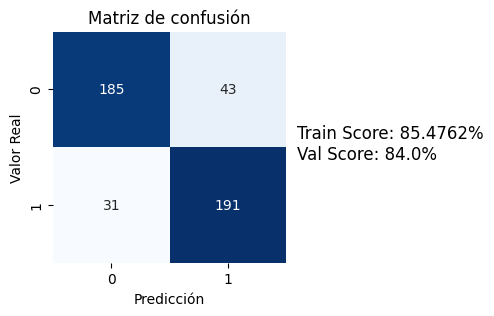

In [ ]:
# REGRESIÓN LOGÍSTICA:

# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********
modeloLR = LogisticRegression(  max_iter=100
                              , C=3
                              , penalty= 'l2'
                              , solver='lbfgs'
                             )
resultadoLR = resultados(modeloLR, trainEmb,y_train,valEmb,y_val,testEmb)

# *********** Aquí termina la sección de agregar código *************


Modelo → RandomForestClassifier
----------------------------------------------------------
Clase           Precisión    Recall    F1-Score    Soporte
------------  -----------  --------  ----------  ---------
0                  0.5339    0.6204      0.5739        216
1                  0.5879    0.5         0.5404        234
macro avg          0.5609    0.5602      0.5571        450
weighted avg       0.562     0.5578      0.5565        450


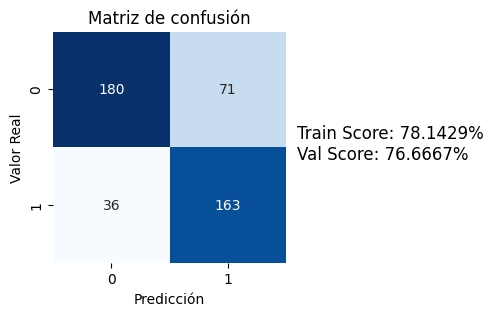

In [ ]:
# BOSQUE ALEATORIO (Random Forest):

# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********
modeloRF = RandomForestClassifier(  n_estimators=100
                                  , max_depth= 1
                                  , criterion='gini'
                                  , min_samples_split=2
                                  , random_state=42
                                  )
resultadoRF = resultados(modeloRF,trainEmb,y_train,valEmb,y_val,testEmb)
# *********** Aquí termina la sección de agregar código *************

# **Pregunta - 9:**

### 9. Evaluación del mejor modelo con el conjunto de prueba:

1. **Selección del mejor modelo:**  
   Utiliza el mejor modelo obtenido en el ejercicio anterior.

2. **Evaluación con el conjunto de prueba:**  
   Aplica el nuevo conjunto de prueba para obtener los siguientes resultados:
   - **Matriz de confusión**: La mejor matriz de confusión para el modelo seleccionado.
   - **Reporte de clasificación:** Utiliza la función `classification_report()` de **sklearn**.

---




Reporte del mejor modelo con el conjunto de Prueba (Test).


Obteniendo resultados del mejor modelo
----------------------------------------------------------
Score en entrenamiento: 85.4762
Score en validación: 84.0
Modelo → LogisticRegression
----------------------------------------------------------
Clase           Precisión    Recall    F1-Score    Soporte
------------  -----------  --------  ----------  ---------
0                  0.5175    0.5463      0.5315        216
1                  0.5586    0.5299      0.5439        234
macro avg          0.5381    0.5381      0.5377        450
weighted avg       0.5389    0.5378      0.5379        450


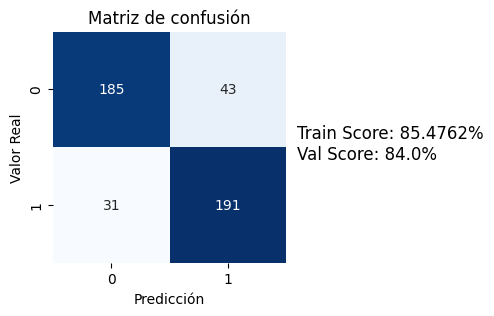

In [ ]:
# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********

# Se combinan los diccionarios resultadoLR y resultadoRF en un solo diccionario llamado resultados_entrenamiento.
resultados_entrenamiento = {**resultadoLR, **resultadoRF}

# Se selecciona el modelo con el mejor desempeño en la validación utilizando el score_val como criterio de comparación.
mejorModelo = max(resultados_entrenamiento.items(), key=lambda item: item[1]['score_val'])

# Se imprimen los resultados del mejor modelo identificado en la validación.
print(f"Obteniendo resultados del mejor modelo")
print(f"--"*29)
print(f"Score en entrenamiento: \033[32m\033[1m{mejorModelo[1]['score_train']}\033[0m")
print(f"Score en validación: \033[32m\033[1m{mejorModelo[1]['score_val']}\033[0m")

resultado = resultados(mejorModelo[0], trainEmb,y_train,valEmb,y_val,testEmb)

# *********** Aquí termina la sección de agregar código *************

# **Pregunta - 10:**

### 10. Segunda parte de la actividad:

1. **Transformación a vectores embebidos:**  
   Realiza la transformación a vectores embebidos de todos los 3000 comentarios tal como están dados en los archivos.  
   - Selecciona el modelo de vector embebido que consideres más adecuado.
   - Indica la cantidad de tokens de OpenAI utilizados en el proceso.

2. **Partición de datos (Train-Val-Test):**  
   Realiza una partición de los datos en los siguientes conjuntos:
   - **Train:** 70%
   - **Validation (Val):** 15%
   - **Test:** 15%  
   Utiliza la misma semilla que empleaste en el ejercicio 3 para la partición de los datos.

3. **Modelos de aprendizaje automático:**  
   Utiliza los modelos de regresión logística y bosque aleatorio (random forest) para este problema de clasificación.  
   Para cada modelo, muestra los siguientes resultados:
   - **Exactitud (accuracy).**
   - **Reporte de clasificación:** Utiliza la función `classification_report()` de **sklearn**.

4. **Verificación de sobreentrenamiento:**  
   Asegúrate de verificar que los modelos no estén sobreentrenados (overfitting).

5. **Comparación de resultados:**  
   Compara los resultados obtenidos con los de la primera parte de la actividad.

6. **Modelos adicionales (opcional):**  
   Si lo consideras adecuado, puedes incluir algún otro modelo de aprendizaje automático para comparar los resultados.

---


In [ ]:
# Incluye todas las líneas de código y celdas que consideres adecuadas para este ejercicio.

# Se crea un diccionario que asigna cada reseña ('review') a su etiqueta ('label').
tokens_comentario = dict(zip(df['review'],df['label']))

# Se realiza una copia del DataFrame original para preservar los datos antes de modificaciones.
df_comentario = df.copy()

# Se generan o recuperan los embeddings.
respaldo = 'embeddings_diccionario_p10.pkl'
diccionario_comentario = obtener_embedding(tokens_comentario,respaldo)

# Se asigna el embedding correspondiente a cada reseña en el DataFrame, mapeando los valores con el diccionario generado.
df_comentario["embedding"] = df_comentario["review"].map(diccionario_comentario)


# ******* Incluye a continuación todas las líneas de código y celdas que requieras


Generando embeddings para 2,982 registros.
Total estimado de tokens: 2,982
El archivo datos/embeddings_diccionario_p10.pkl localizado.
Diccionario cargado.


In [ ]:
X_embeding = df_comentario["embedding"].to_list()

# ——————————————————————————
# 1️⃣ Partición inicial: 70% train, 30% (val + test)
# ——————————————————————————

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(
    X_embeding,           # Lista de comentarios procesados
    Y,                    # Serie de etiquetas
    train_size=0.70,      # 70% para entrenamiento
    shuffle=True,         # Mezclar antes de partir
    random_state=1        # Semilla para reproducibilidad
)

# ——————————————————————————
# 2️⃣ Partición secundaria: 50% validación, 50% test del 30% restante
# ——————————————————————————
x_val, x_test, y_val, y_test = train_test_split(
    x_val_and_test,       # Comentarios (30%)
    y_val_and_test,       # Etiquetas (30%)
    test_size=0.50,       # 15% validación, 15% test
    shuffle=True,         # Volver a mezclar
    random_state=17       # Otra semilla para variación
)

Modelo → LogisticRegression
----------------------------------------------------------
Clase           Precisión    Recall    F1-Score    Soporte
------------  -----------  --------  ----------  ---------
0                  0.4815    0.4815      0.4815        216
1                  0.5214    0.5214      0.5214        234
macro avg          0.5014    0.5014      0.5014        450
weighted avg       0.5022    0.5022      0.5022        450


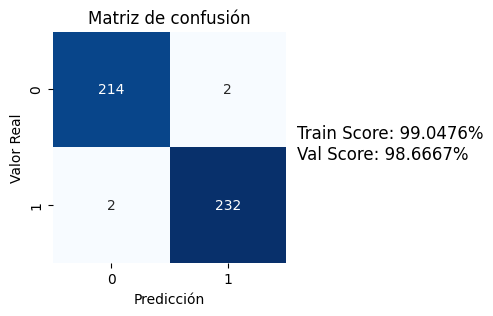

In [ ]:
resultadoLRemb = resultados(modeloLR, x_train,y_train,x_val,y_val,x_test)

Modelo → RandomForestClassifier
----------------------------------------------------------
Clase           Precisión    Recall    F1-Score    Soporte
------------  -----------  --------  ----------  ---------
0                  0.4789    0.4722      0.4755        216
1                  0.519     0.5256      0.5223        234
macro avg          0.4989    0.4989      0.4989        450
weighted avg       0.4997    0.5         0.4998        450


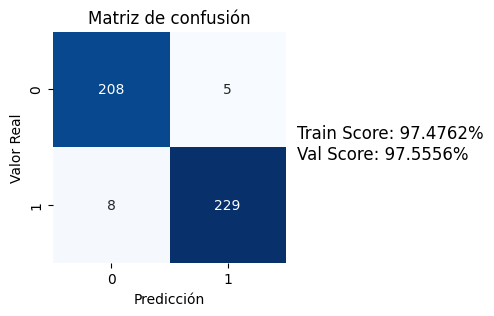

In [ ]:
resultadoRFemb = resultados(modeloRF, x_train,y_train,x_val,y_val,x_test)

# **Pregunta - 11:**

11. Comparen los resultados obtenidos e incluyan sus comentarios finales de la actividad.



Incluye tus comentarios finales de la actividad.

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto: +++++++++++

# **Fin de la Actividad de Vectores Embebidos - OpenAI**